In [265]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 21 11:22:11 2019

@author: naeemsunesara
"""

import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [266]:
df = pd.read_csv('sf_business_dataset.csv', encoding='LATIN-1')

cols = df.columns
print(cols)

Index(['Location Id', 'Business Account Number', 'Ownership Name', 'DBA Name',
       'Street Address', 'City', 'State', 'Source Zipcode',
       'Business Start Date', 'Business End Date', 'Location Start Date',
       'Location End Date', 'Mail Address', 'Mail City', 'Mail Zipcode',
       'Mail State', 'NAICS Code', 'NAICS Code Description', 'Parking Tax',
       'Transient Occupancy Tax', 'LIC Code', 'LIC Code Description',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries',
       'Business Corridor', 'Business Location'],
      dtype='object')


In [267]:
### 1st Problem
df['City'] = df['City'].str.replace('+',' ').str.lower()
sf = df[(df['City'] == 'san francisco') & (df['Business End Date'].isna())]
sf['Source Zipcode'] = sf['Source Zipcode'].fillna(sf['Source Zipcode'].mode()[0])
sf_zipcode = sf.groupby(['Source Zipcode']).size().sort_values(ascending = False).reset_index(name='Count')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [268]:
sf_zipcode.head()

,Source Zipcode,Count
0,94110.0,10426
1,94103.0,9690
2,94107.0,8337
3,94109.0,8099
4,94102.0,7087


In [269]:
map_df = gpd.read_file('./San_Francisco_Zipcodes/geo_export_ae9cf2fa-1cc8-4a65-8e07-488c7cbc7539.shp')

In [270]:
map_df.head()

,id,multigeom,objectid,po_name,pop10_sqmi,pop2010,sqmi,st_area_sh,st_length_,state,zip,zip_code,geometry
0,94124.0,F,55.0,San Francisco,7645.4,37233.0,4.87,1.357258e+08,112600.382071,CA,94124,94124.0,POLYGON ((-122.3800890113633 37.75275898753988...
1,94127.0,F,56.0,San Francisco,11244.7,19116.0,1.70,4.732928e+07,37576.389714,CA,94127,94127.0,POLYGON ((-122.4442709852785 37.73159598046237...
2,94131.0,F,57.0,San Francisco,11153.0,24202.0,2.17,6.062910e+07,55831.469347,CA,94131,94131.0,POLYGON ((-122.4555040090645 37.76091139152248...
3,94133.0,T,59.0,San Francisco,34200.0,24966.0,0.73,2.040908e+07,39351.719600,CA,94133,94133.0,POLYGON ((-122.4190612997865 37.81154880328311...
4,94132.0,F,58.0,San Francisco,6440.6,26986.0,4.19,1.123208e+08,53343.402992,CA,94132,94132.0,"POLYGON ((-122.486279012768 37.73682097594768,..."


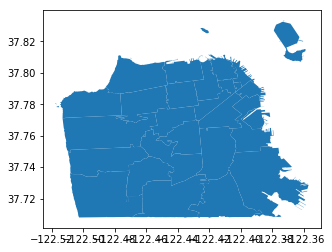

In [271]:
map_df.plot()

In [272]:
merged = map_df.set_index('id').join(sf_zipcode.set_index('Source Zipcode'))

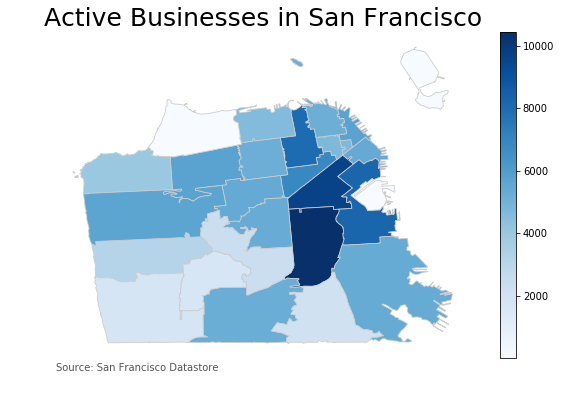

In [273]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Count'

# set the range for the choropleth
vmin, vmax = 1, 10426

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Active Businesses in San Francisco',
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: San Francisco Datastore',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)


In [274]:
#### 2nd Problem #####

In [275]:
sf['Business Start Date'] = pd.to_datetime(sf['Business Start Date'])
import datetime
x = datetime.datetime.now()
sf['age'] = x.year - sf['Business Start Date'].dt.year
sf_2 = sf[(sf['NAICS Code'].notnull()) & (sf['age'] <= 2)][['NAICS Code','NAICS Code Description','age']]
sf_2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,NAICS Code,NAICS Code Description,age
130036,2300-2399,Construction,2
130104,5100-5199,Information,2
130120,7210-7219,Accommodations,2
130154,4800-4999,Transportation and Warehousing,2
130669,4800-4999,Transportation and Warehousing,2


In [276]:
##### 3rd Problem #####

sf_3 = sf[sf['NAICS Code'].notnull()][['NAICS Code','NAICS Code Description','age']].sort_values(by= 'age', ascending=False)
sf_3['year'] = 2019 - sf_3['age']
ind = sf_3.groupby(['NAICS Code Description'])
real_estate = ind.get_group('Real Estate and Rental and Leasing Services').groupby(['year']).size().reset_index(name='count')
pst = ind.get_group('Professional, Scientific, and Technical Services').groupby(['year']).size().reset_index(name='count')
rt = ind.get_group('Retail Trade').groupby(['year']).size().reset_index(name='count')
fs = ind.get_group('Food Services').groupby(['year']).size().reset_index(name='count')
tw = ind.get_group('Transportation and Warehousing').groupby(['year']).size().reset_index(name='count') 
peh = ind.get_group('Private Education and Health Services').groupby(['year']).size().reset_index(name='count')                
const = ind.get_group('Construction').groupby(['year']).size().reset_index(name='count')                                         
aer = ind.get_group('Arts, Entertainment, and Recreation').groupby(['year']).size().reset_index(name='count')                  
acc = ind.get_group('Accommodations ').groupby(['year']).size().reset_index(name='count') 
finance = ind.get_group('Financial Services').groupby(['year']).size().reset_index(name='count')
info = ind.get_group('Information').groupby(['year']).size().reset_index(name='count')
wt = ind.get_group('Wholesale Trade').groupby(['year']).size().reset_index(name='count')
admin = ind.get_group('Administrative and Support Services').groupby(['year']).size().reset_index(name='count')
manu = ind.get_group('Manufacturing').groupby(['year']).size().reset_index(name='count')
certain = ind.get_group('Certain Services').groupby(['year']).size().reset_index(name='count')
insurance = ind.get_group('Insurance').groupby(['year']).size().reset_index(name='count')
utilities = ind.get_group('Utilities').groupby(['year']).size().reset_index(name='count')     

In [277]:
import plotly.plotly as py
from plotly.graph_objs import *

In [278]:
py.sign_in('naeemsunesara', 'moRyYgwm86TQ64o4w9MD')
trace1 = {
  "x": ["1945", "1946", "1950", "1954", "1959", "1962", "1963", "1965", "1966", "1967", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "2", "1", "2", "1", "2", "1", "2", "6", "1", "1817", "112", "132", "155", "187", "164", "196", "159", "242", "177", "189", "132", "133", "86", "67", "74", "118", "79", "200", "350", "320", "446", "163", "96", "113", "173", "142", "149", "227", "220", "324", "294", "324", "229", "338", "280", "304", "388", "324", "1492", "282", "310", "367", "604", "601", "615", "2896", "1018", "794", "301"], 
  "mode": "lines", 
  "name": "Real Estate and Rental", 
  "type": "scatter", 
  "visible": True, 
  "xsrc": "naeemsunesara:1:87417b", 
  "ysrc": "naeemsunesara:1:ec265c"
}
trace2 = {
  "x": ["1953", "1957", "1963", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2029"], 
  "y": ["1", "1", "2", "168", "17", "17", "29", "20", "28", "18", "31", "35", "35", "25", "33", "35", "53", "45", "28", "63", "65", "64", "103", "103", "132", "97", "108", "149", "145", "179", "278", "272", "275", "291", "332", "340", "297", "385", "431", "494", "537", "531", "530", "547", "640", "686", "808", "929", "1076", "1102", "1103", "1374", "563", "1"], 
  "mode": "lines", 
  "name": "Professional Scientific", 
  "type": "scatter", 
  "visible": True, 
  "xsrc": "naeemsunesara:0:e873f6", 
  "ysrc": "naeemsunesara:0:e95bd0"
}
trace3 = {
  "x": ["1958", "1959", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "1", "291", "7", "7", "26", "19", "15", "25", "29", "22", "32", "42", "25", "35", "36", "31", "49", "57", "51", "35", "66", "86", "82", "62", "78", "98", "74", "126", "112", "147", "213", "147", "303", "143", "158", "218", "229", "250", "226", "295", "263", "272", "324", "387", "400", "420", "519", "470", "638", "771", "352"], 
  "mode": "lines", 
  "name": "Retail Trade", 
  "type": "scatter", 
  "visible": True, 
  "xsrc": "naeemsunesara:3:71dc8d", 
  "ysrc": "naeemsunesara:3:e4d268"
}
trace4 = {
  "x": ["1960", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "91", "7", "4", "3", "3", "8", "10", "8", "5", "6", "15", "7", "10", "30", "11", "24", "29", "17", "22", "43", "41", "37", "19", "31", "137", "208", "76", "94", "105", "71", "85", "116", "59", "110", "155", "135", "167", "171", "230", "174", "241", "274", "339", "423", "443", "557", "613", "659", "716", "361"], 
  "mode": "lines", 
  "name": "Food Services", 
  "type": "scatter", 
  "visible": True, 
  "xsrc": "naeemsunesara:2:911bf5", 
  "ysrc": "naeemsunesara:2:7c4716"
}
trace5 = {
  "x": ["1949", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1978", "1979", "1980", "1981", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["2", "14", "2", "5", "1", "2", "2", "1", "1", "4", "5", "1", "1", "1", "2", "1", "3", "8", "4", "8", "8", "1", "14", "10", "9", "11", "21", "10", "19", "25", "29", "16", "30", "34", "28", "35", "44", "974", "41", "72", "60", "54", "96", "191", "446", "1056", "3300", "187"], 
  "mode": "lines", 
  "name": "Transportation", 
  "type": "scatter", 
  "visible": True, 
  "xsrc": "naeemsunesara:7:efc7a3", 
  "ysrc": "naeemsunesara:7:a53a7a"
}
trace6 = {
  "x": ["1948", "1952", "1955", "1958", "1959", "1962", "1963", "1964", "1965", "1966", "1967", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2024"], 
  "y": ["3", "1", "1", "7", "3", "1", "1", "3", "48", "1", "2", "86", "7", "12", "54", "7", "11", "17", "15", "18", "18", "15", "12", "13", "14", "29", "16", "35", "22", "20", "49", "39", "53", "39", "53", "49", "52", "55", "131", "60", "110", "134", "89", "109", "113", "121", "129", "203", "152", "146", "197", "195", "198", "239", "263", "305", "287", "355", "378", "445", "213", "1"], 
  "mode": "lines", 
  "name": "Private Education and Health", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:4:d136a1", 
  "ysrc": "naeemsunesara:4:9a63d4"
}
trace7 = {
  "x": ["1968", "1969", "1970", "1971", "1972", "1973", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["49", "6", "3", "13", "6", "2", "9", "9", "12", "7", "9", "8", "13", "18", "28", "11", "24", "21", "22", "85", "69", "57", "59", "59", "48", "61", "73", "116", "72", "107", "121", "112", "137", "136", "169", "169", "192", "161", "177", "192", "202", "217", "249", "211", "248", "326", "284", "448", "207"], 
  "mode": "lines", 
  "name": "Construction", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:6:e7b432", 
  "ysrc": "naeemsunesara:6:220e40"
}
trace8 = {
  "x": ["1947", "1951", "1952", "1954", "1957", "1964", "1965", "1966", "1967", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "1", "1", "1", "4", "1", "4", "5", "2", "12", "6", "5", "6", "7", "2", "7", "2", "17", "17", "5", "5", "11", "6", "5", "14", "14", "14", "18", "19", "34", "44", "21", "14", "31", "40", "51", "63", "81", "103", "105", "129", "92", "92", "137", "138", "151", "159", "154", "188", "173", "161", "190", "248", "268", "307", "388", "385", "505", "257"], 
  "mode": "lines", 
  "name": "Arts , Entertainment", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:5:c1a06a", 
  "ysrc": "naeemsunesara:5:9ab76c"
}
trace9 = {
  "x": ["1932", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2021"], 
  "y": ["1", "91", "4", "10", "5", "13", "10", "6", "13", "10", "14", "8", "21", "1", "14", "4", "8", "5", "10", "10", "19", "16", "50", "5", "9", "5", "3", "20", "10", "13", "12", "17", "33", "2", "23", "30", "58", "25", "20", "51", "122", "23", "39", "44", "40", "78", "85", "178", "916", "763", "373", "3"], 
  "mode": "lines", 
  "name": "Accomodations", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:13:9d3148", 
  "ysrc": "naeemsunesara:13:378116"
}
trace10 = {
  "x": ["1956", "1968", "1970", "1971", "1972", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "27", "5", "22", "2", "3", "6", "6", "2", "2", "1", "3", "8", "27", "16", "16", "12", "33", "18", "28", "16", "13", "13", "18", "32", "27", "36", "58", "44", "55", "53", "55", "61", "85", "72", "142", "143", "134", "99", "101", "177", "145", "164", "217", "234", "207", "230", "66"], 
  "mode": "lines", 
  "name": "Financial Services", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:11:d4f0cb", 
  "ysrc": "naeemsunesara:11:901b31"
}
trace11 = {
  "x": ["1849", "1947", "1950", "1968", "1971", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "1", "1", "51", "1", "4", "6", "1", "2", "3", "1", "3", "4", "1", "1", "4", "3", "6", "3", "4", "3", "6", "29", "9", "6", "24", "17", "25", "37", "52", "40", "23", "23", "45", "55", "58", "68", "142", "61", "78", "99", "159", "258", "229", "237", "251", "255", "111"], 
  "line": {
    "color": "rgb(21, 106, 46)", 
    "dash": "solid", 
    "shape": "linear"
  }, 
  "mode": "lines", 
  "name": "Information", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:9:7a103e", 
  "ysrc": "naeemsunesara:9:154dbf"
}
trace12 = {
  "x": ["1968", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["71", "5", "4", "6", "3", "7", "5", "8", "7", "14", "8", "8", "29", "8", "11", "13", "14", "18", "29", "29", "27", "29", "34", "34", "33", "41", "42", "59", "51", "46", "77", "61", "57", "51", "67", "75", "67", "94", "56", "89", "91", "88", "116", "108", "126", "150", "146", "193", "78"], 
  "line": {"color": "rgb(132, 82, 73)"}, 
  "mode": "lines", 
  "name": "Wholesale Trade", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:14:d20b3b", 
  "ysrc": "naeemsunesara:14:ddf745"
}
trace13 = {
  "x": ["1897", "1945", "1951", "1953", "1955", "1958", "1963", "1966", "1968", "1969", "1970", "1971", "1972", "1973", "1975", "1976", "1977", "1978", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["1", "1", "1", "1", "2", "2", "1", "1", "56", "4", "259", "5", "5", "9", "2", "3", "2", "2", "3", "3", "2", "1", "2", "8", "18", "19", "11", "13", "7", "6", "19", "5", "34", "28", "16", "93", "36", "25", "32", "53", "21", "39", "44", "86", "76", "65", "64", "62", "78", "90", "115", "109", "122", "139", "257", "168"], 
  "line": {"color": "rgb(64, 57, 114)"}, 
  "mode": "lines", 
  "name": "Administrative", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:15:7d457a", 
  "ysrc": "naeemsunesara:15:7f6a59"
}
trace14 = {
  "x": ["1968", "1969", "1970", "1971", "1972", "1973", "1975", "1976", "1977", "1978", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["45", "18", "5", "2", "3", "3", "4", "5", "2", "6", "2", "6", "6", "2", "6", "9", "4", "6", "8", "18", "4", "7", "15", "14", "16", "11", "22", "19", "24", "18", "22", "16", "17", "20", "35", "27", "37", "53", "47", "43", "66", "60", "52", "98", "90", "123", "128", "49"], 
  "line": {"color": "rgb(158, 161, 14)"}, 
  "mode": "lines", 
  "name": "Manufacturing", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:12:270061", 
  "ysrc": "naeemsunesara:12:88cdd3"
}
trace15 = {
  "x": ["1947", "1968", "1974", "1978", "1979", "1982", "1983", "1984", "1987", "1989", "1990", "1991", "1992", "1993", "1994", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2020"], 
  "y": ["2", "1", "1", "1", "1", "1", "1", "1", "1", "2", "3", "3", "4", "1", "6", "7", "6", "7", "7", "3", "7", "16", "16", "7", "14", "13", "14", "13", "11", "12", "23", "28", "40", "35", "47", "101", "84", "1"], 
  "line": {"color": "rgb(102, 204, 221)"}, 
  "mode": "lines", 
  "name": "Certain Services", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:10:35188a", 
  "ysrc": "naeemsunesara:10:edfb0e"
}
trace16 = {
  "x": ["1955", "1956", "1965", "1968", "1969", "1971", "1972", "1973", "1974", "1975", "1976", "1979", "1982", "1984", "1985", "1986", "1987", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["3", "2", "1", "15", "2", "1", "4", "2", "1", "1", "2", "3", "3", "6", "1", "1", "9", "17", "4", "4", "8", "1", "5", "2", "10", "9", "10", "9", "11", "20", "17", "14", "14", "9", "9", "20", "17", "16", "24", "16", "16", "40", "33", "25", "40", "7"], 
  "line": {"color": "rgb(176, 131, 182)"}, 
  "mode": "lines", 
  "name": "Insurance", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:16:a7a9e0", 
  "ysrc": "naeemsunesara:16:f48c9f"
}
trace17 = {
  "x": ["1965", "1984", "1987", "1988", "1993", "1994", "1996", "1998", "1999", "2000", "2001", "2002", "2004", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
  "y": ["2", "2", "1", "1", "13", "1", "1", "4", "3", "2", "7", "1", "1", "2", "3", "4", "11", "1", "7", "4", "8", "7", "12", "2"], 
  "line": {"color": "rgb(163, 155, 135)"}, 
  "mode": "lines", 
  "name": "Utilities", 
  "type": "scatter", 
  "xsrc": "naeemsunesara:17:152434", 
  "ysrc": "naeemsunesara:17:bf059e"
}
data = Data([trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17])
layout = {
  "autosize": True, 
  "xaxis": {
    "autorange": True, 
    "domain": [0, 1], 
    "range": [1849, 2029], 
    "title": {"text": "Years"}, 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "domain": [0, 1], 
    "range": [-182.277777778, 3483.27777778], 
    "title": {"text": "Number of Businesses"}, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.iplot(fig)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [279]:
plot_url